<a href="https://colab.research.google.com/github/jmarcano101/data110/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import matplotlib.pyplot as plt
import numpy as np



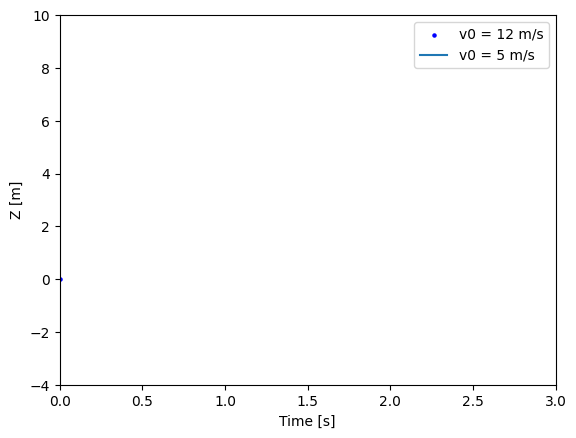

In [17]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)




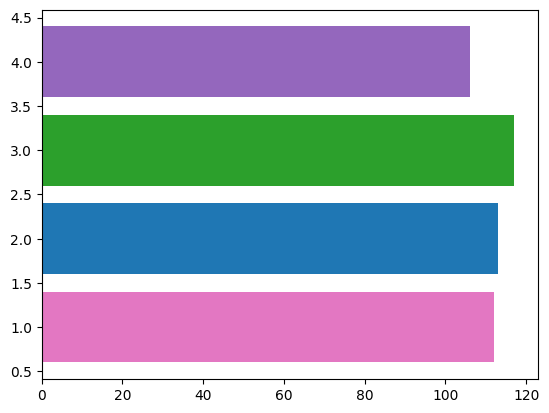

In [21]:
fig, ax = plt.subplots()
rng = np.random.default_rng(19680801)
data = np.array([20, 20, 20, 20])
x = np.array([1, 2, 3, 4])

artists = []
colors = ['tab:pink', 'tab:blue', 'tab:green', 'tab:purple']
for i in range(20):
    data += rng.integers(low=0, high=10, size=data.shape)
    container = ax.barh(x, data, color=colors)
    artists.append(container)


ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
plt.show()

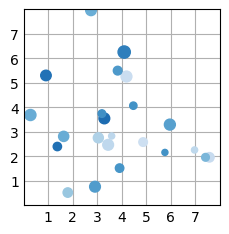

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

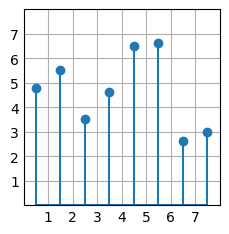

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.stem(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

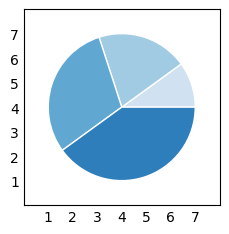

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')


# make data
x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

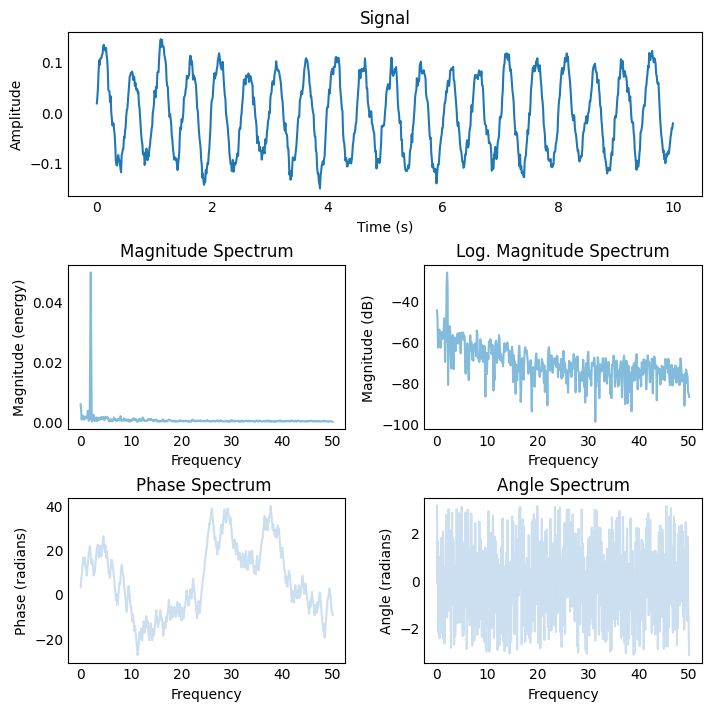

In [31]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig = plt.figure(figsize=(7, 7), layout='constrained')
axs = fig.subplot_mosaic([["signal", "signal"],
                          ["magnitude", "log_magnitude"],
                          ["phase", "angle"]])

# plot time signal:
axs["signal"].set_title("Signal")
axs["signal"].plot(t, s, color='C0')
axs["signal"].set_xlabel("Time (s)")
axs["signal"].set_ylabel("Amplitude")

# plot different spectrum types:
axs["magnitude"].set_title("Magnitude Spectrum")
axs["magnitude"].magnitude_spectrum(s, Fs=Fs, color='C1')

axs["log_magnitude"].set_title("Log. Magnitude Spectrum")
axs["log_magnitude"].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axs["phase"].set_title("Phase Spectrum ")
axs["phase"].phase_spectrum(s, Fs=Fs, color='C2')

axs["angle"].set_title("Angle Spectrum")
axs["angle"].angle_spectrum(s, Fs=Fs, color='C2')

plt.show()